# O'zapft is! 

Oktoberfest is the biggest beer festival which helds in Munich every year.  
Upon the event kickoff last weekend, September,21, I decided to cast a glance at the public avalaible data set provided by the official portal of the city of Munich https://www.opengov-muenchen.de.

The aim of this notebook is to go through data and find out some insights concerning the Oktoberfest data which contains information about the event since 1985 until 2018.

In the beginning , I will start by loading data and describing it , doing some cleansing if needed and then analyzing the way the festival attributes evolve over the last 34 years.

I start by loading the suitable librairies which will be useful all along the analysis phase.

In [8]:
import numpy as np # allows to work with numeric data 
import pandas as pd # allows to work with structured data
import matplotlib.pyplot as plt #Python 2D plotting library 
import seaborn as sns

Having the environment set up, I download the csv file from Munchen.de (see the link above) and then I load it into a data frame using the pandas.read_csv function

In [9]:
repository='Downloads/oktoberfestgesamt19852018.csv'
df_Oktoberfest = pd.read_csv(repository,sep=",") # use sep="," for coma separation. 

The second step consists in visualizing the first 5 rows using the pandas head method, having some informations about the schema of the loaded data frame using pandas info method and checking statistical summary using the describe method.

In [10]:
df_Oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [11]:
df_Oktoberfest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
jahr               34 non-null int64
dauer              34 non-null int64
besucher_gesamt    34 non-null float64
besucher_tag       34 non-null int64
bier_preis         34 non-null float64
bier_konsum        34 non-null int64
hendl_preis        34 non-null float64
hendl_konsum       34 non-null int64
dtypes: float64(3), int64(5)
memory usage: 2.2 KB


In [12]:
df_Oktoberfest.describe()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2001.500000,16.294118,6.314706,388.000000,6.728235,61744.588235,7.457941,575947.852941
std,9.958246,0.629064,0.396295,26.713973,2.476544,9977.387480,2.535983,123127.062981
min,1985.000000,16.000000,5.500000,329.000000,3.200000,48698.000000,3.920000,351705.000000
25%,1993.250000,16.000000,6.025000,369.000000,4.755000,52918.250000,5.272500,483642.500000
50%,2001.500000,16.000000,6.400000,394.000000,6.610000,60608.500000,8.110000,522346.500000
75%,2009.750000,16.000000,6.500000,406.000000,8.725000,69208.750000,9.495000,693913.250000
max,2018.000000,18.000000,7.100000,444.000000,11.300000,79225.000000,11.670000,807710.000000


The data set does not contain any null values as shown above and the data types are the expected ones. Consequently, no cleaning tasks are required except changing column names for a better understanding.

In [13]:
df_Oktoberfest.columns =['Year','Duration_Days','Number_Of_Visitors','Number_Of_Visitors_Per_Day',
                        'Beer_Price','Beer_Consumption','Chicken_Price','Chicken_Consumption']

# Descriptive Analysis

In this chapter, I will focus on drawing some charts in order to find out and show up insights. Let's start by studiying the way beer consumption, beer prices and visitors have been moved with the times.

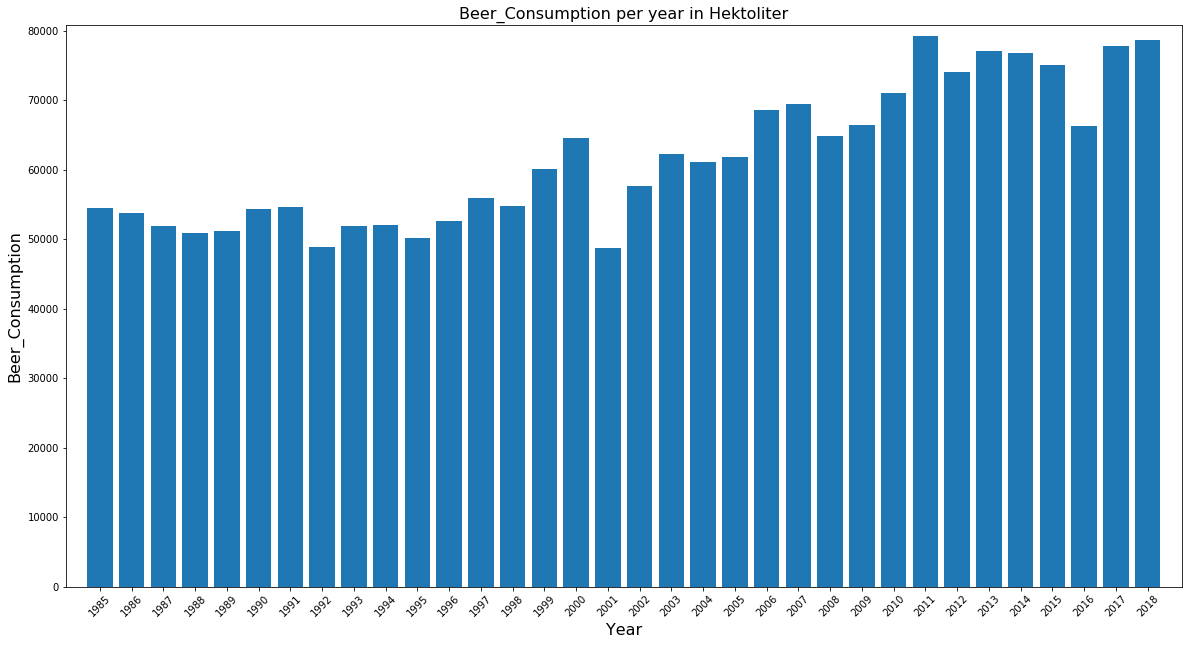

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
# grab data:
height =df_Oktoberfest ["Beer_Consumption"]
bars = df_Oktoberfest ["Year"]
# Define bars
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
# Labeling
plt.xticks(y_pos, bars, rotation='45')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Beer_Consumption',fontsize=16)
plt.margins(0.02)
plt.subplots_adjust(bottom=0.1)
plt.title('Beer_Consumption per year in Hektoliter',fontsize=16)
# Show graphic
plt.show()

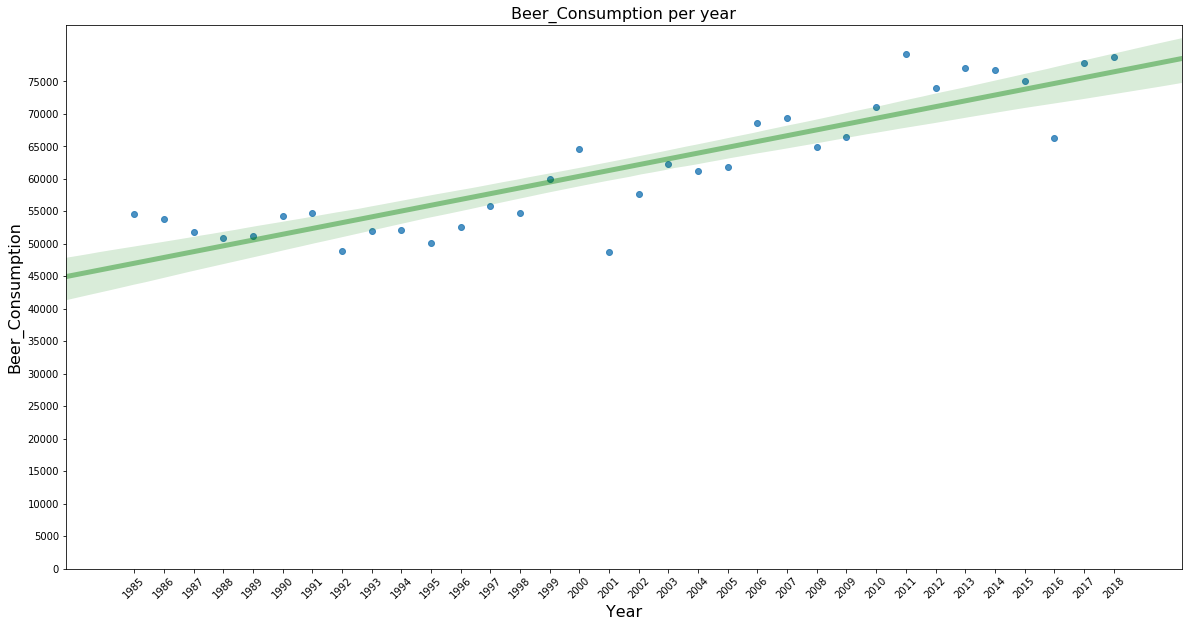

In [26]:
sns.regplot(x=df_Oktoberfest["Year"], y=df_Oktoberfest['Beer_Consumption'], line_kws={"color":"g","alpha":0.4,"lw":5})
plt.title('Beer_Consumption per year',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Beer_Consumption',fontsize=16)
plt.xticks(np.arange(1985, 2019, step=1),rotation='45')
plt.yticks(np.arange(0, 80000, step=5000))
plt.show()

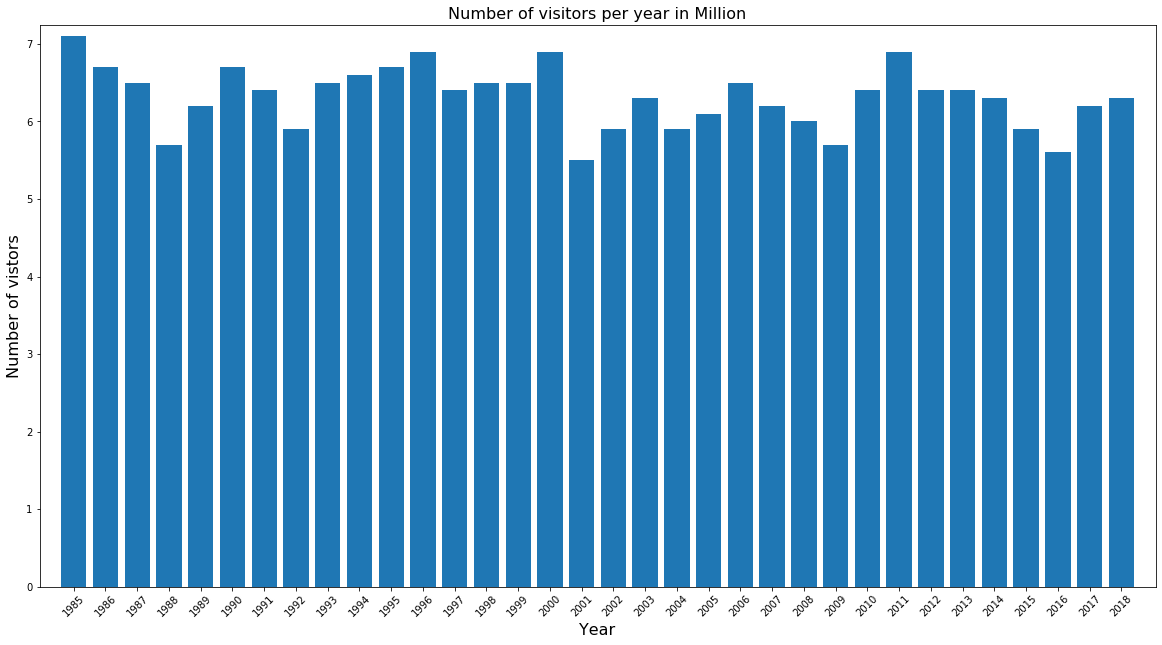

In [19]:
# grab data:
height =df_Oktoberfest["Number_Of_Visitors"] 
bars = df_Oktoberfest["Year"]
# Create bars
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation='45')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of vistors',fontsize=16)
plt.margins(0.02)
plt.subplots_adjust(bottom=0.1)
plt.title('Number of visitors per year in Million',fontsize=16)
# Show graphic
plt.show()

Once I finish with plotting charts of both Beer_consumption and Number_Of_Visitors related data, I decide to check if there is any correlation between the data set columns and especially the relationship between Beer consumption and Number of vistors but a big surprise was discovered !!! The beer consumption is not going up because the number of visitors levels up (correlation coefficient=-0.033), but because visitors drink more.

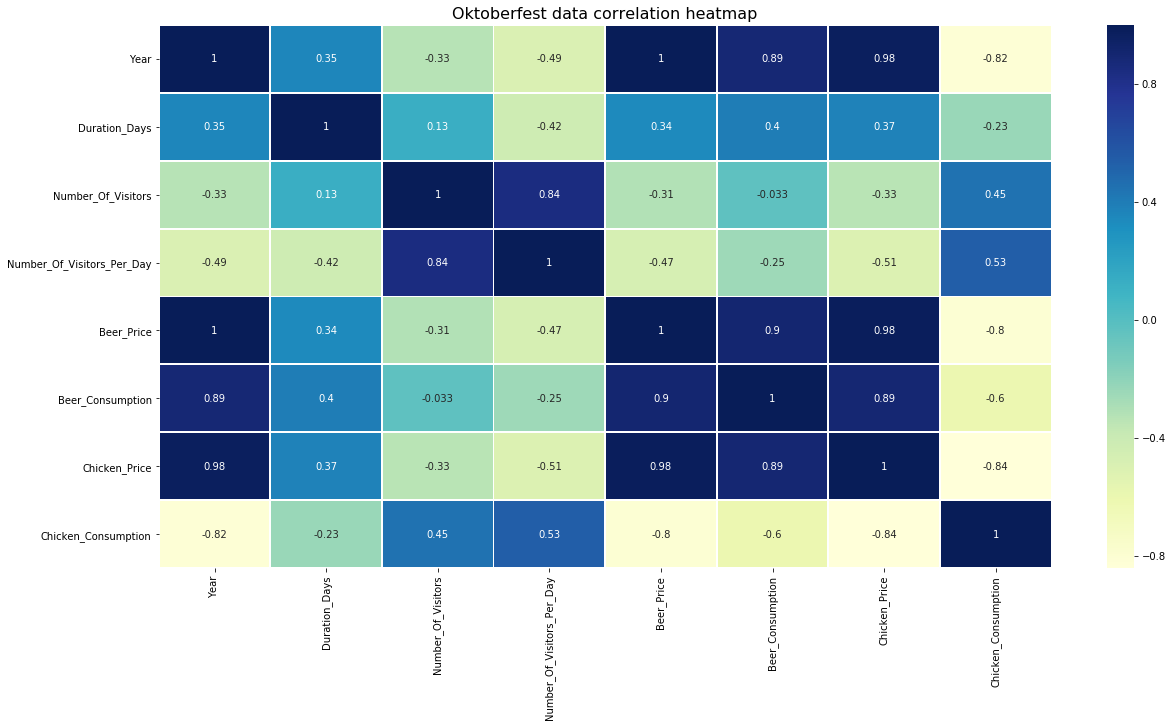

In [21]:
corr = df_Oktoberfest.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True,linewidth=1)
plt.title('Oktoberfest data correlation heatmap',fontsize=16)
# Show graphic
plt.show()